#                                Customer Analysis

#### Problem Statement:  A well known company with numerous products needs to analyze their customer behaviour and classify them to know whether they will accept the campaigns held by the company.

#### In this project I will be doing an unsupervised clustering of data on customer records from the company's database. Customer clustering/segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. It helps to modify products according to distinct needs and behaviours of the customers.

### Importing libraries

In [66]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [187]:
data = pd.read_csv("market_train.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [188]:
test = pd.read_csv("market_test.csv")
test.shape

(559, 31)

In [189]:
data.shape

(1680, 31)

#### The data is provided as two parts - one for training and the other for testing. The columns can be categorized in to 4 types - customer information, Products, Promotion, Places(details about purchase),

### Exploratory Analysis and Data Cleaning

In [190]:
# information about the data and features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

In [191]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         559 non-null    int64  
 1   Unnamed: 0           559 non-null    int64  
 2   ID                   559 non-null    int64  
 3   Year_Birth           559 non-null    int64  
 4   Education            559 non-null    object 
 5   Marital_Status       559 non-null    object 
 6   Income               552 non-null    float64
 7   Kidhome              559 non-null    int64  
 8   Teenhome             559 non-null    int64  
 9   Dt_Customer          559 non-null    object 
 10  Recency              559 non-null    int64  
 11  MntCoke              559 non-null    int64  
 12  MntFruits            559 non-null    int64  
 13  MntMeatProducts      559 non-null    int64  
 14  MntFishProducts      559 non-null    int64  
 15  MntSweetProducts     559 non-null    int

#### There are unwanted coulmns, missing values, values that are objects. These need to be addressed

In [192]:
# dropping 2 unwanted columns
data = data.drop(["Unnamed: 0.1","Unnamed: 0"], axis='columns')

In [193]:
test = test.drop(["Unnamed: 0.1","Unnamed: 0"], axis='columns')

In [194]:
# replacing null values
income_mean = data['Income'].mean()
data['Income'].fillna(value=income_mean, inplace = True)

In [195]:
income_mean = test['Income'].mean()
test['Income'].fillna(value=income_mean, inplace = True)

In [196]:
# converting Dt_Customer to datetime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1680 non-null   int64         
 1   Year_Birth           1680 non-null   int64         
 2   Education            1680 non-null   object        
 3   Marital_Status       1680 non-null   object        
 4   Income               1680 non-null   float64       
 5   Kidhome              1680 non-null   int64         
 6   Teenhome             1680 non-null   int64         
 7   Dt_Customer          1680 non-null   datetime64[ns]
 8   Recency              1680 non-null   int64         
 9   MntCoke              1680 non-null   int64         
 10  MntFruits            1680 non-null   int64         
 11  MntMeatProducts      1680 non-null   int64         
 12  MntFishProducts      1680 non-null   int64         
 13  MntSweetProducts     1680 non-nul

In [197]:
test["Dt_Customer"] = pd.to_datetime(test["Dt_Customer"])

In [198]:
# handling categorical variables
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Menikah        650
Bertunangan    438
Lajang         360
Cerai          177
Janda           52
Duda             3
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 S1     834
S3     373
S2     279
D3     159
SMA     35
Name: Education, dtype: int64


In [199]:
# Replacing marital status with english synonyms
data["Marital_Status"] = data['Marital_Status'].replace('Menikah','Married')
data["Marital_Status"] = data['Marital_Status'].replace('Bertunangan','Engaged')
data["Marital_Status"] = data['Marital_Status'].replace('Lajang','Bachelor')
data["Marital_Status"] = data['Marital_Status'].replace('Cerai','Divorced')

test["Marital_Status"] = test['Marital_Status'].replace('Menikah','Married')
test["Marital_Status"] = test['Marital_Status'].replace('Bertunangan','Engaged')
test["Marital_Status"] = test['Marital_Status'].replace('Lajang','Bachelor')
test["Marital_Status"] = test['Marital_Status'].replace('Cerai','Divorced')

data["Marital_Status"].value_counts()

Married     650
Engaged     438
Bachelor    360
Divorced    177
Janda        52
Duda          3
Name: Marital_Status, dtype: int64

### Feature Engineering

In [200]:
#Creating some new features for grouping

#Age of customer today 
data["Age"] = 2023-data["Year_Birth"]
test["Age"] = 2023-test["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntCoke"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
test["Spent"] = test["MntCoke"]+ test["MntFruits"]+ test["MntMeatProducts"]+ test["MntFishProducts"]+ test["MntSweetProducts"]+ test["MntGoldProds"]
    
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]
test["Children"]=test["Kidhome"]+test["Teenhome"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)
test["Is_Parent"] = np.where(test.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"SMA":"Undergraduate","S1":"Graduate","D3":"Graduate","S2":"Postgraduate","S3":"Postgraduate"})
test["Education"]=test["Education"].replace({"SMA":"Undergraduate","S1":"Graduate","D3":"Graduate","S2":"Postgraduate","S3":"Postgraduate"})



In [201]:
#Dropping some of the redundant features
to_drop = ["Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)
test = test.drop(to_drop, axis=1)


In [202]:
# converting income to thousands
data["Income"] = data["Income"]/1000
test["Income"] = test["Income"]/1000

data.describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Is_Parent
count,1680.000000,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1680.000000
mean,52014.343355,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,1.657738e+05,36954.761905,27016.666667,43339.880952,...,0.074405,0.069048,0.062500,0.011905,0.010119,0.144048,54.152381,6.039030e+05,0.952381,0.711310
std,21373.445420,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,2.242424e+05,54165.456719,41529.595304,51363.336472,...,0.262507,0.253611,0.242134,0.108490,0.100113,0.351243,12.027192,6.017014e+05,0.763284,0.453289
min,1730.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000e+03,0.000000,0.000000
25%,35790.750000,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,6.900000e+04,0.000000,0.000000
50%,51445.500000,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,3.915000e+05,1.000000,1.000000
75%,67897.500000,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,2.322500e+05,48000.000000,32000.000000,54250.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.035500e+06,1.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,2.525000e+06,3.000000,1.000000


Reletiving Plot Of Some Selected Features


<Figure size 640x480 with 0 Axes>

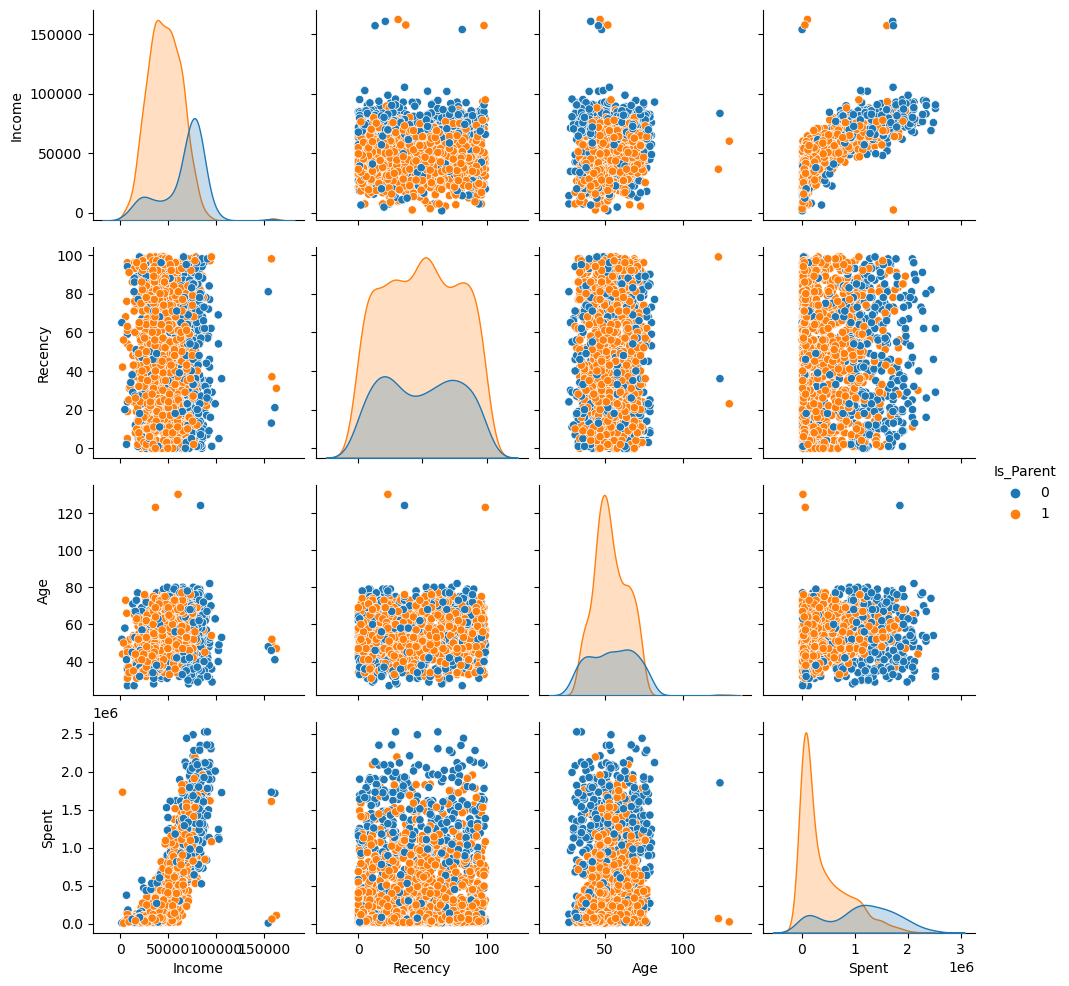

In [203]:
#To plot some selected features 
To_Plot = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
print("Reletiving Plot Of Some Selected Features")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent")
#Taking hue 
plt.show()

In [204]:
#Dropping the outliers on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

test = test[(test["Age"]<90)]
test = test[(test["Income"]<60000)]

len(data), len(test)

(1677, 343)

<AxesSubplot:>

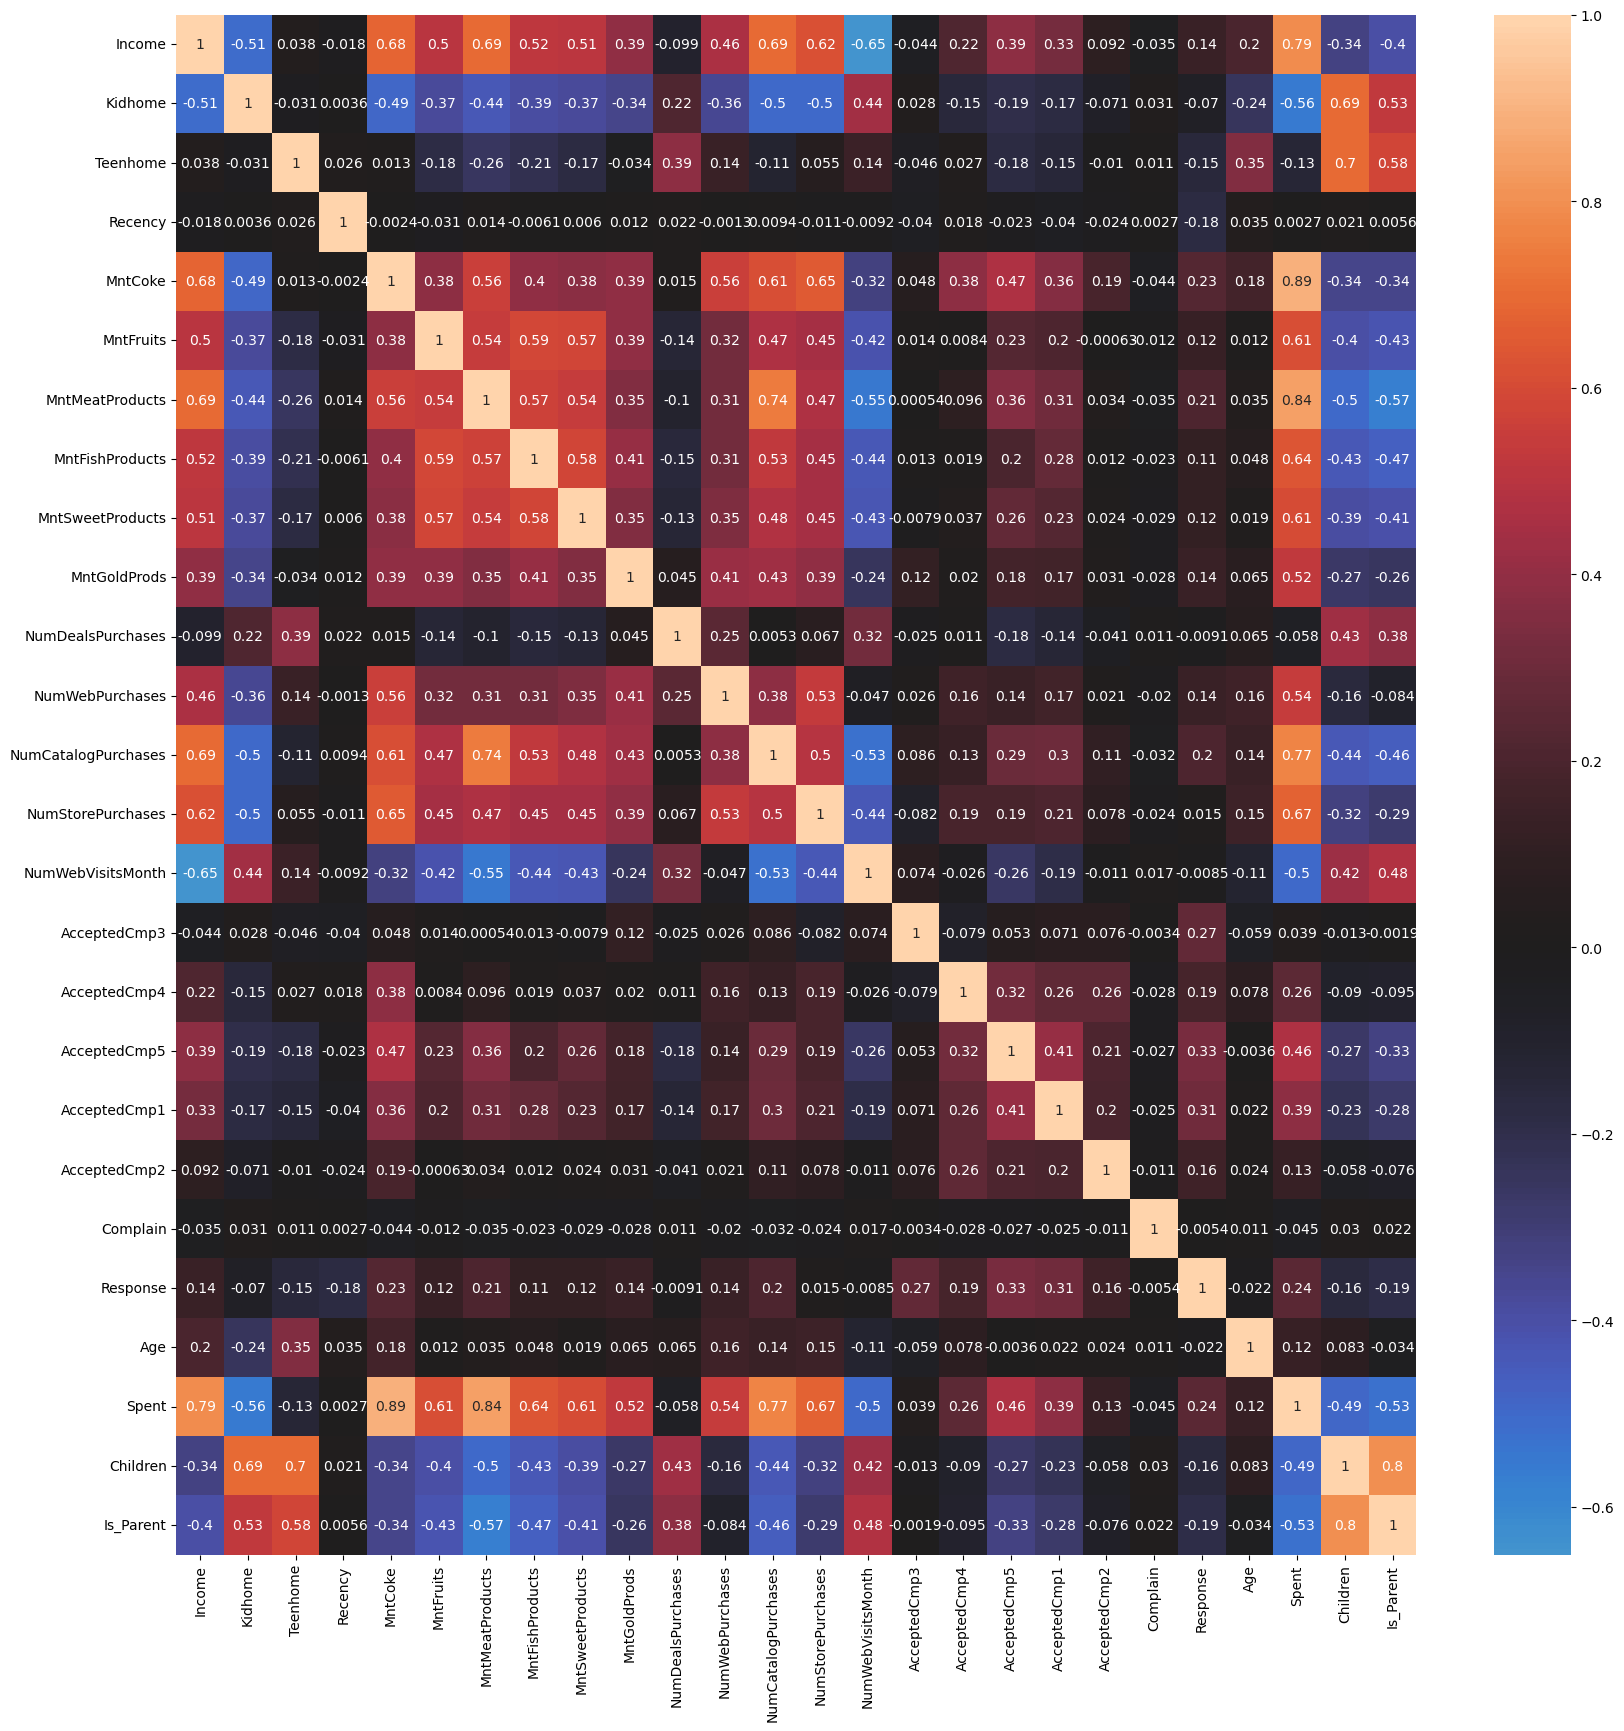

In [205]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

### Data Preprocessing

In [206]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [207]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [208]:
LE=LabelEncoder()
for i in object_cols:
    test[i]=test[[i]].apply(LE.fit_transform)

In [209]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Dt_Customer']
ds = ds.drop(cols_del, axis=1)


In [210]:
ts = test.copy()
ts = ts.drop(cols_del, axis=1)

In [211]:
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [212]:
scaler = StandardScaler()
scaler.fit(ts)
scaled_ts = pd.DataFrame(scaler.transform(ts),columns= ts.columns )

In [213]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Is_Parent
0,-0.802765,-1.489737,0.287258,-0.827652,-0.909671,0.308614,0.974724,1.575077,1.696889,2.493384,...,0.873808,0.335077,1.479648,2.465421,-0.553204,0.679643,1.028244,1.685883,-1.248249,-1.569992
1,-0.802765,-1.489737,-0.264686,1.001034,0.908587,-0.383107,-0.868284,-0.630678,-0.712751,-0.645282,...,-0.727995,-0.173451,-1.138620,-0.562293,-1.169631,-0.137097,1.285830,-0.959818,1.371667,0.636946
2,-0.802765,0.024072,0.917871,-0.827652,-0.909671,-0.798139,0.357434,0.586290,-0.172814,1.367157,...,-0.024764,-0.681979,1.479648,-0.225880,1.296078,-0.545468,0.341349,0.286490,-1.248249,-1.569992
3,-0.802765,0.024072,-1.186528,1.001034,-0.909671,-0.798139,-0.868284,-0.554617,-0.650279,-0.497580,...,-0.747529,-0.173451,-0.764582,-0.898705,-0.553204,0.271273,-1.290028,-0.916555,0.061709,0.636946
4,1.064415,1.033277,0.294512,1.001034,-0.909671,1.553710,-0.389811,0.434169,-0.212974,0.167078,...,-0.552187,1.352133,0.357533,0.110533,0.063223,-0.137097,-1.032442,-0.302552,0.061709,0.636946


### Clustering
#### The clustering will be performed by Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

##### Steps involved in the Clustering:
    Elbow Method to determine the number of clusters to be formed
    Clustering via Agglomerative Clustering
    Examining the clusters formed via scatter plot

In [214]:
inertia_values=[]
k = range(1,10)
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(scaled_ds)
    inertia_values.append(model.inertia_)

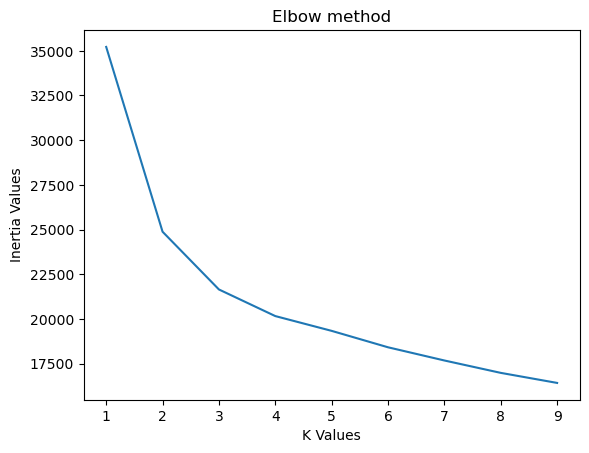

In [215]:
plt.plot(k,inertia_values)
plt.title("Elbow method")
plt.xlabel("K Values")
plt.ylabel("Inertia Values")

plt.show()

In [216]:
score = silhouette_score(scaled_ds, model.labels_, metric='euclidean')
score

0.14616140075079537

In [217]:
#Initiating the Agglomerative Clustering model with k=4
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(scaled_ds)
scaled_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

In [218]:
test_AC = AC.fit_predict(scaled_ts)
scaled_ts["Clusters"] = test_AC
test["Clusters"]= test_AC

In [219]:
score = silhouette_score(scaled_ds, model.labels_, metric='euclidean')
score

0.15411881363017987

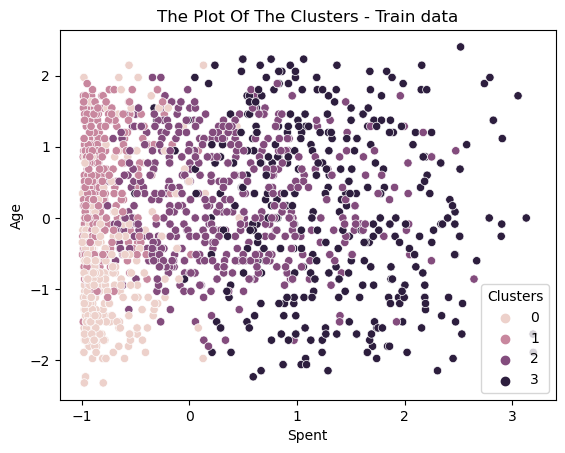

In [220]:
#Plotting the clusters for train data

sns.scatterplot(data = scaled_ds,x=scaled_ds["Spent"], y=scaled_ds["Age"],hue=scaled_ds["Clusters"])
plt.title("The Plot Of The Clusters - Train data")
plt.show()

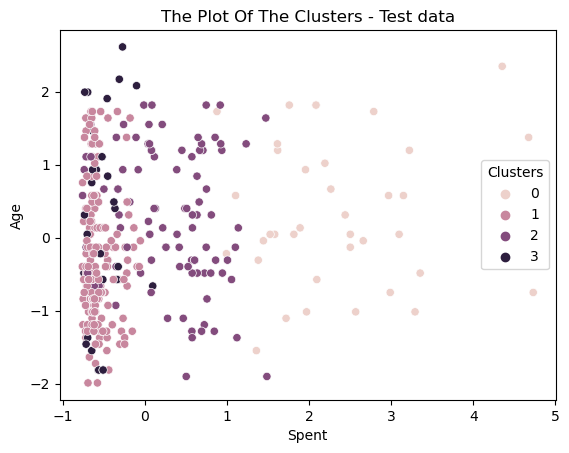

In [221]:
#Plotting the clusters for test data
sns.scatterplot(data = scaled_ts,x=scaled_ts["Spent"], y=scaled_ts["Age"],hue=scaled_ts["Clusters"])
plt.title("The Plot Of The Clusters - Test data")
plt.show()

### Evaluating Models
#### The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

Text(0.5, 1.0, 'Distribution Of The Clusters for test data')

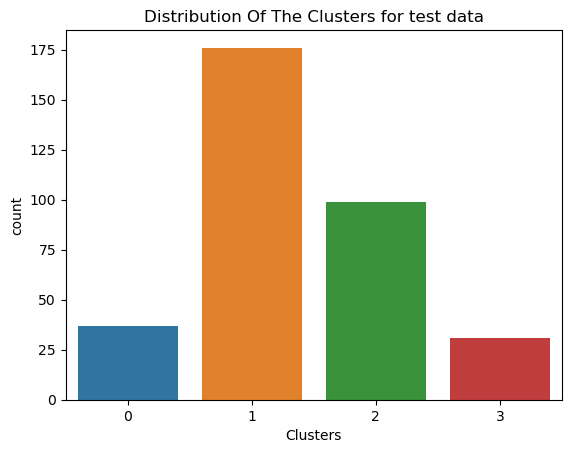

In [222]:
pl = sns.countplot(x=test["Clusters"])
pl.set_title("Distribution Of The Clusters for test data")

#### The clusters seem to be fairly distributed

Text(0.5, 1.0, "Cluster's Profile Based On Income And Spending - train")

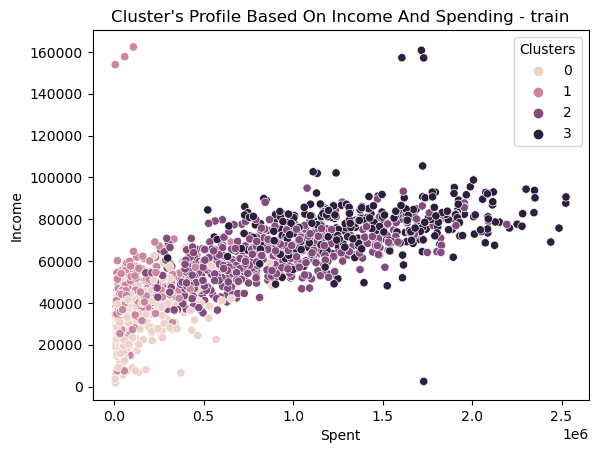

In [223]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending - train")

##### Classification
    Group 0: Low income and low spending
    Group 1: High income and high spending
    Group 2: High income and low spending
    Group 3: Average income and average spending

Text(0.5, 1.0, "Cluster's Profile Based On Income And Spending - Test data")

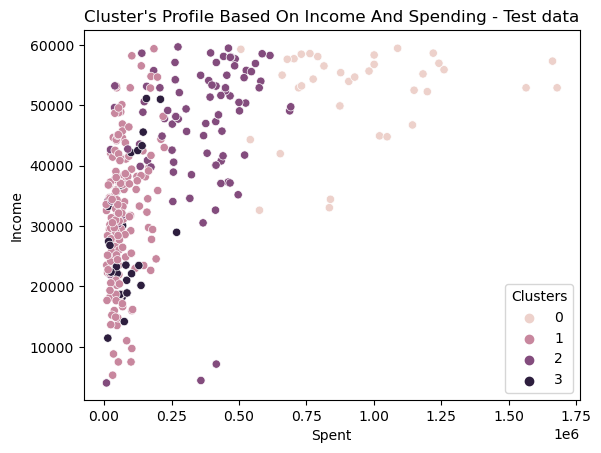

In [105]:
pl = sns.scatterplot(data = test,x=test["Spent"], y=test["Income"],hue=test["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending - Test data")

##### Classification
    Group 0: High income and average spending
    Group 1: Low income and low spending
    Group 2: Low income high spending
    Group 3: Average income and low spending

Text(0.5, 1.0, "Cluster's Profile Based On Age And Spending - train")

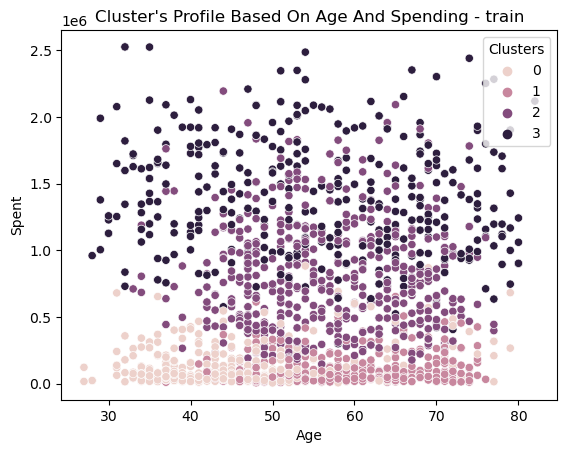

In [106]:
pl = sns.scatterplot(data = data,x=data["Age"], y=data["Spent"],hue=data["Clusters"])
pl.set_title("Cluster's Profile Based On Age And Spending - train")

Text(0.5, 1.0, "Cluster's Profile Based On Age And Spending - test")

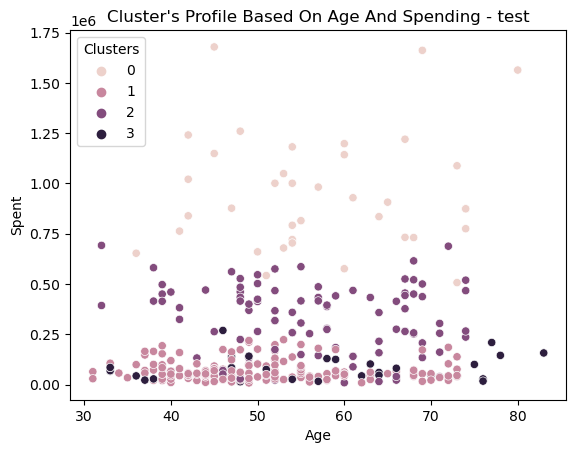

In [107]:
pl = sns.scatterplot(data = test,x=test["Age"], y=test["Spent"],hue=test["Clusters"])
pl.set_title("Cluster's Profile Based On Age And Spending - test")

Group 0: Age between 40 & 80 with average to high spending
Group 1: Age between 30 & 80 with average spending
Group 2: Age between 25 & 80 with high spending
Group 3: Age between 40 & 70 low spending

Text(0.5, 1.0, "Cluster's Profile Based On Is a parent And Spending - test")

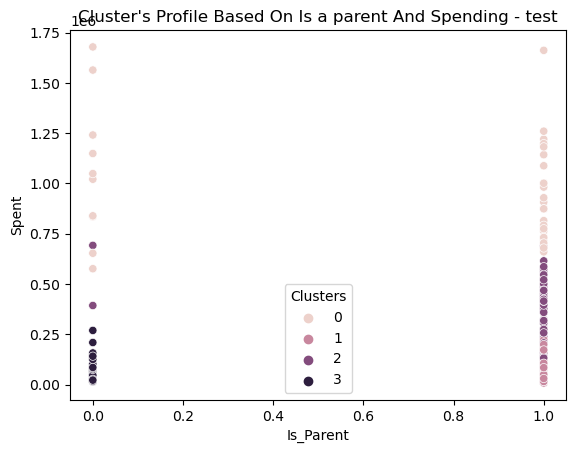

In [108]:
pl = sns.scatterplot(data = test,x=test["Is_Parent"], y=test["Spent"],hue=test["Clusters"])
pl.set_title("Cluster's Profile Based On Is a parent And Spending - test")

Most spending comes from customers who are not parents

Text(0.5, 0, 'Number Of Total Accepted Promotions')

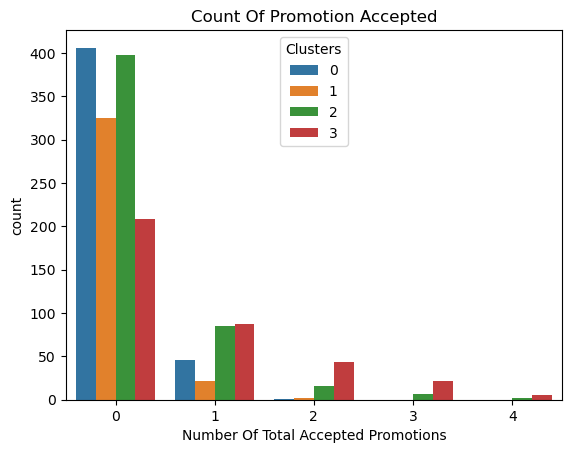

In [109]:
#Creating a feature to get a sum of accepted promotions for train data 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")

Text(0.5, 0, 'Number Of Total Accepted Promotions')

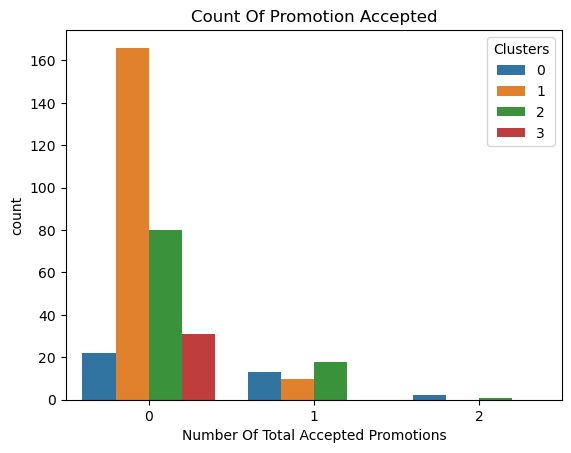

In [110]:
#Creating a feature to get a sum of accepted promotions for test data
test["Total_Promos"] = test["AcceptedCmp1"]+ test["AcceptedCmp2"]+ test["AcceptedCmp3"]+ test["AcceptedCmp4"]+ test["AcceptedCmp5"]
#Plotting count of total campaign accepted.
pl = sns.countplot(x=test["Total_Promos"],hue=test["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")

#### There isnt any overwhelming response to the campaigns so far. There are only a few participants overall. Moreover, no one has taken part in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

### Profiling the clusters

#### This is done to get an idea about who are valuable customer and who needs more attention from the retail store's marketing team. Plotting some of the features that indicates customer's personal traits based on the cluster they are in.

<Figure size 640x480 with 0 Axes>

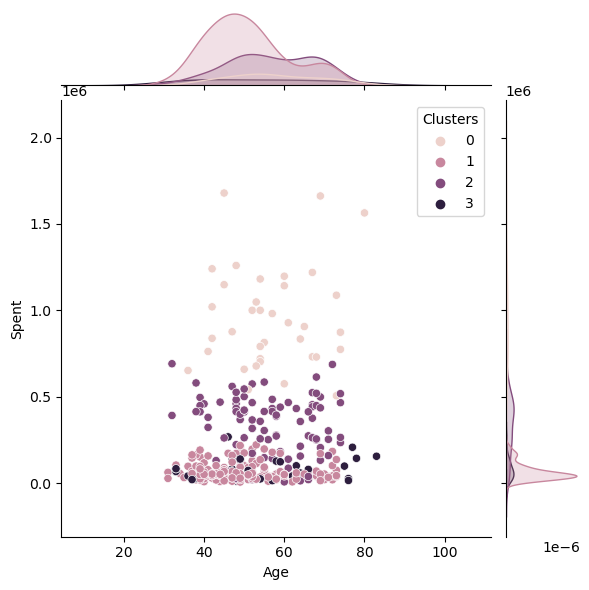

<Figure size 640x480 with 0 Axes>

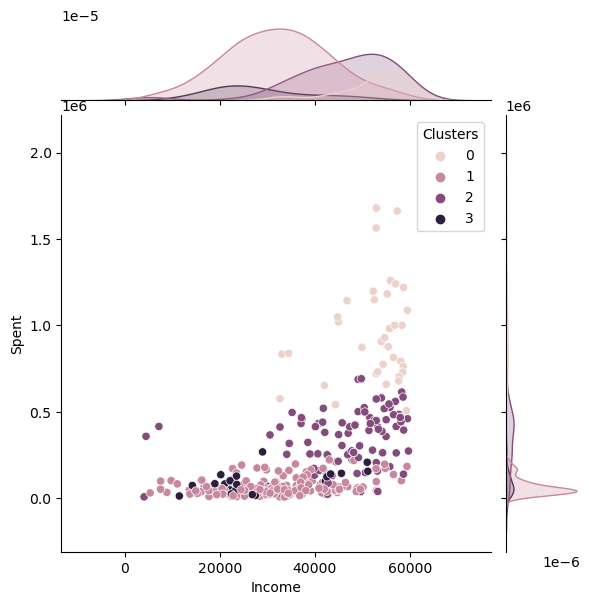

<Figure size 640x480 with 0 Axes>

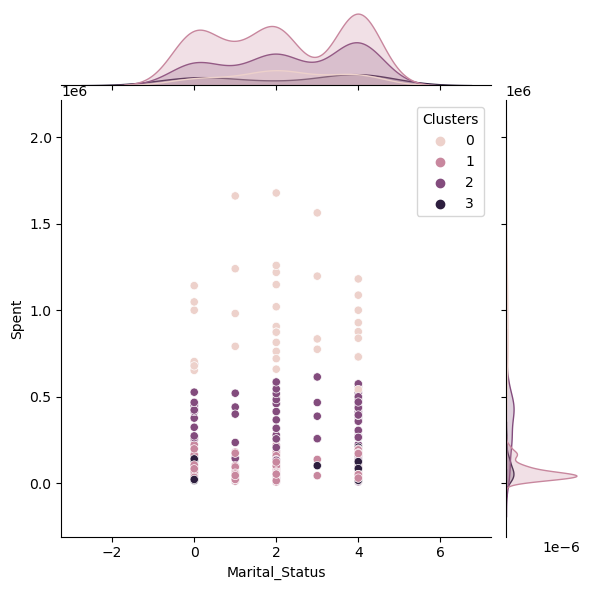

<Figure size 640x480 with 0 Axes>

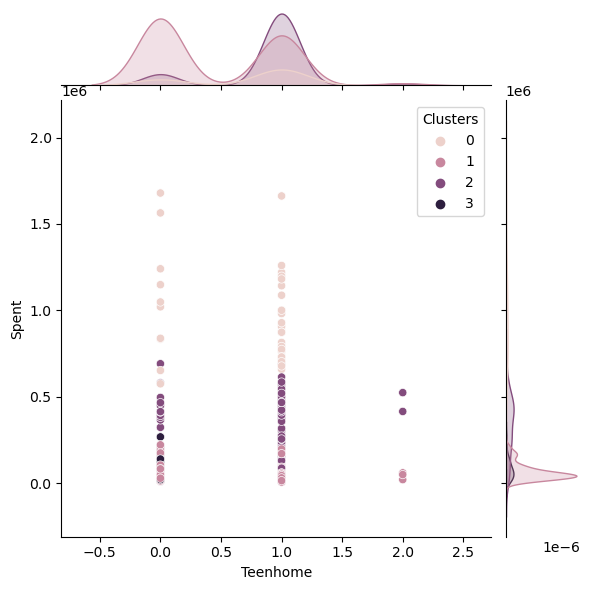

<Figure size 640x480 with 0 Axes>

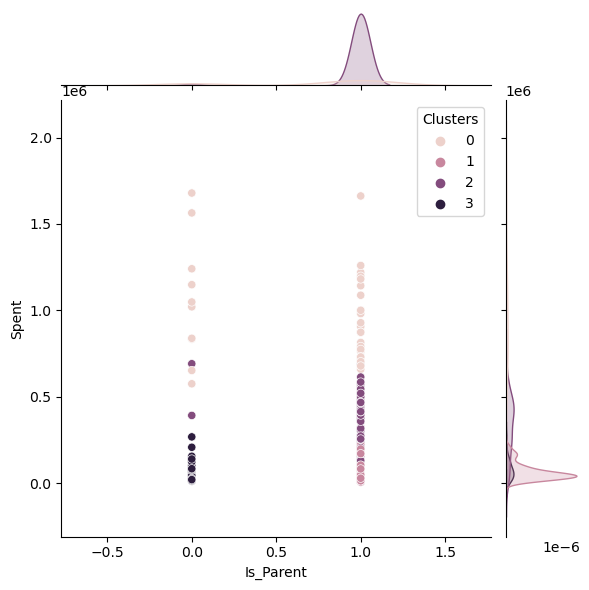

<Figure size 640x480 with 0 Axes>

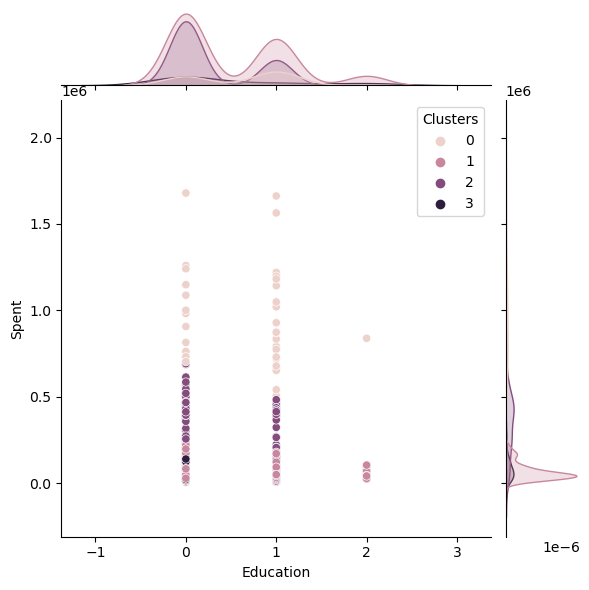

In [111]:
Features = ["Age","Income", "Marital_Status", "Teenhome", "Is_Parent", "Education"]

for i in Features:
    plt.figure()
    sns.jointplot(x=test[i], y=test["Spent"], hue =test["Clusters"], kind="scatter")
    plt.show()

#### The following inferences are obtained from the analysis:
##### Cluster 0:
    Between age 40 & 80 with average spending with high income. Mostly parents with teens at home. Mostly graduates
##### Cluster 1:
    Between age 20 & 90 with low spending and low-average income. Mostly parents with all education types
##### Cluster 2:
    Between age 40 & 80 with high spending and average to high income. Includes people in all marital status and all education types
##### Cluster 3:
    Between age 40 & 80 low spending and mostly high income. There are mostly parents with teens. 
    

### Classification

#### Trying the classification using Random Forest Classifier

In [224]:
data.head()
data.shape

(1677, 30)

In [225]:
scaled_ds.shape

(1677, 22)

In [226]:
scaled_ds["Response"] = data["Response"]
scaled_ds["Response"].unique()

array([ 1.,  0., nan])

In [227]:
scaled_ds = scaled_ds.dropna()

In [236]:
# Classifying based on response for promotion

scaled_ts["Response"] = test["Response"]
scaled_ts = scaled_ts.dropna()

In [230]:
target = ["Response"]
x_train = scaled_ds.drop(target, axis=1)
y_train = scaled_ds[target]

In [237]:
x_test = scaled_ts.drop(target,axis=1)
y_test = scaled_ts[target]

In [231]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [232]:
model.score(x_train,y_train)

0.983273596176822

In [238]:
model.score(x_test,y_test)

0.8640776699029126

In [165]:
#Classifying based on clusters

target = ["Clusters"]
x_train = scaled_ds.drop(target, axis=1)
y_train = scaled_ds[target]

In [166]:
x_test = scaled_ts.drop(target,axis=1)
y_test = scaled_ts["Clusters"]

In [167]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [168]:
model.score(x_train,y_train)

1.0

In [169]:
model.score(x_test,y_test)

0.41690962099125367

In [170]:
model.predict([[-0.768549,-0.138043,0.025063,0.764156,0.823622,1.271718,-0.432502,-0.197509,-0.219981,-0.254726,-0.176870,0.064589,0.800767,-0.094131,-0.079655,-0.518022,-0.723745,-0.129821,-0.386243,1.259506,0.378594]])

array([2], dtype=int64)

In [171]:
y_test.values[2]

1

In [172]:
y_test.iloc[0]

1

##### The cluster is predicted correctly for the given input and the accuracy score for test data is 0.42


### Conclusion

#### The dataset is analysed and segmented using unsupervised clustering. The whole customers are categorized in to 4 clusters based on their income, age and family background. This can be made use by the company to plan their products and promotions.

##### Thank you!!